In [5]:
import numpy as np
import pandas as pd

def determine_lifetime(df, threshold=0.5):
    """
    Determine the lifetime of LEDs based on their luminosity decay.
    
    Parameters:
        df (pd.DataFrame): DataFrame with time and test columns representing luminosity.
        threshold (float): The luminosity threshold at which the LED is considered dead.
    
    Returns:
        tuple: A list of lifetimes and a list indicating if the lifetime was prolonged (1 for prolonged, 0 otherwise).
    """
    time_col = df['time']
    lifetimes = []
    prolonged = []

    for col in df.columns:
        if col == 'time':
            continue
        
        # Find the first time the luminosity drops below the threshold
        luminosity = df[col]
        below_threshold = luminosity < threshold
        
        if below_threshold.any():
            # Get the time at which the threshold is crossed
            death_index = below_threshold.idxmax()  # First occurrence of True
            lifetimes.append(time_col.iloc[death_index])
            prolonged.append(0)  # Not prolonged
        else:
            # Approximate using exponential decay
            # Fit an exponential function: luminosity = a * exp(-b * time)
            log_luminosity = np.log(luminosity)
            coeffs = np.polyfit(time_col, log_luminosity, 1)  # Fit log-linear model
            b, log_a = -coeffs[0], coeffs[1]
            a = np.exp(log_a)
            
            # Solve for time when luminosity = threshold
            death_time = np.log(threshold / a) / -b
            lifetimes.append(death_time)
            prolonged.append(1)  # Prolonged
    
    return lifetimes, prolonged


# Load the dataset
df = pd.read_csv("S1.csv")




Lifetimes: [4943.802479576001, 6122.724239045018, 6274.78203524984, 1392, 5930.1665733777145, 6301.083145353688, 5349.0560593848795, 1128, 5317.426150752668, 4988.045022705996, 1128, 4267.506949723805, 960, 3992.045652499671, 6375.104572570105]
Prolongation Status: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [7]:
lifetimes_total=[]
prolongation_status_total=[]
stress1_total=[]
stress2_total=[]

##### S1 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("S1.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[20] * 15
stress2_total+=[60] * 15
##### S2 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("S2.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[30] * 15
stress2_total+=[60] * 15
##### S3 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("S3.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[25] * 15
stress2_total+=[72.5] * 15
##### S4 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("S4.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[20] * 15
stress2_total+=[85] * 15
##### S5 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("S5.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[30] * 15
stress2_total+=[85] * 15


print(lifetimes_total)
print(prolongation_status_total)
print(stress1_total)
print(stress2_total)

right_censor=[]
stress1_total_censor=[]
stress2_total_censor=[]
for i in range(len(prolongation_status_total)):
    if prolongation_status_total[i]==1:
        right_censor.append(lifetimes_total[i])
        stress1_total_censor.append(stress1_total[i])
        stress2_total_censor.append(stress2_total[i])


[4943.802479576001, 6122.724239045018, 6274.78203524984, 1392, 5930.1665733777145, 6301.083145353688, 5349.0560593848795, 1128, 5317.426150752668, 4988.045022705996, 1128, 4267.506949723805, 960, 3992.045652499671, 6375.104572570105, 4106.58972215411, 5716.8187504060315, 4268.2247640279675, 3816.372242610562, 5207.581195533215, 3863.6395955095377, 4139.418840393708, 3037.1328495425496, 5442.006387203111, 3922.112630336849, 4413.778981822896, 3656.674317992153, 4066.129345355324, 1857.2716054773164, 4398.082372554861, 3493.1109395356166, 2938.7211290725877, 2643.1634989521444, 3140.199017774946, 3683.4354098855797, 2898.7975077981837, 2954.892287781047, 2934.5440489324437, 2880.2852447106948, 2825.852124368327, 2725.364452314609, 2625.917181320802, 2774.885715872047, 3329.9707306663627, 3685.738414860025, 2338.435486010665, 2013.1959671986167, 2258.9604462021734, 2102.9265508716453, 1560, 2222.9427719526784, 1800, 1991.8396036321492, 2064.7010248911474, 2149.7134139239065, 1128, 1885.57

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/reliability/ALT_fitters.py:919: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything_ALT:
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 75/52 (40.94488188976378% right censored) 

                    ALT_model       a       b           c         m        n    beta    sigma  Log-likelihood    AICc     BIC optimizer
    Weibull_Power_Exponential  27.534         7.12259e+09           -3.67993 3.67371                   -653.3 1314.93 1325.98       TNC
           Weibull_Dual_Power                 9.64039e+09 -0.656003 -2.99038 3.65908                 -656.234  1320.8 1331.85  L-BFGS-B
     Weibull_Dual_Exponential 25.5213 252.626      33.013                    3.49431                 -656.677 1321.68 1332.73       TNC
         Lognormal_Dual_Power                 9.12557e+10 -0.910652 -3.34821         0.497896        -669.927 1348.18 1359.23       TNC
  Lognormal_Power_Exponential 20.9783         1.99921e+09           -3.33893         0.501001        -670.454 1349.24 1360.28       TNC
   Lognormal_Dual_Exponenti

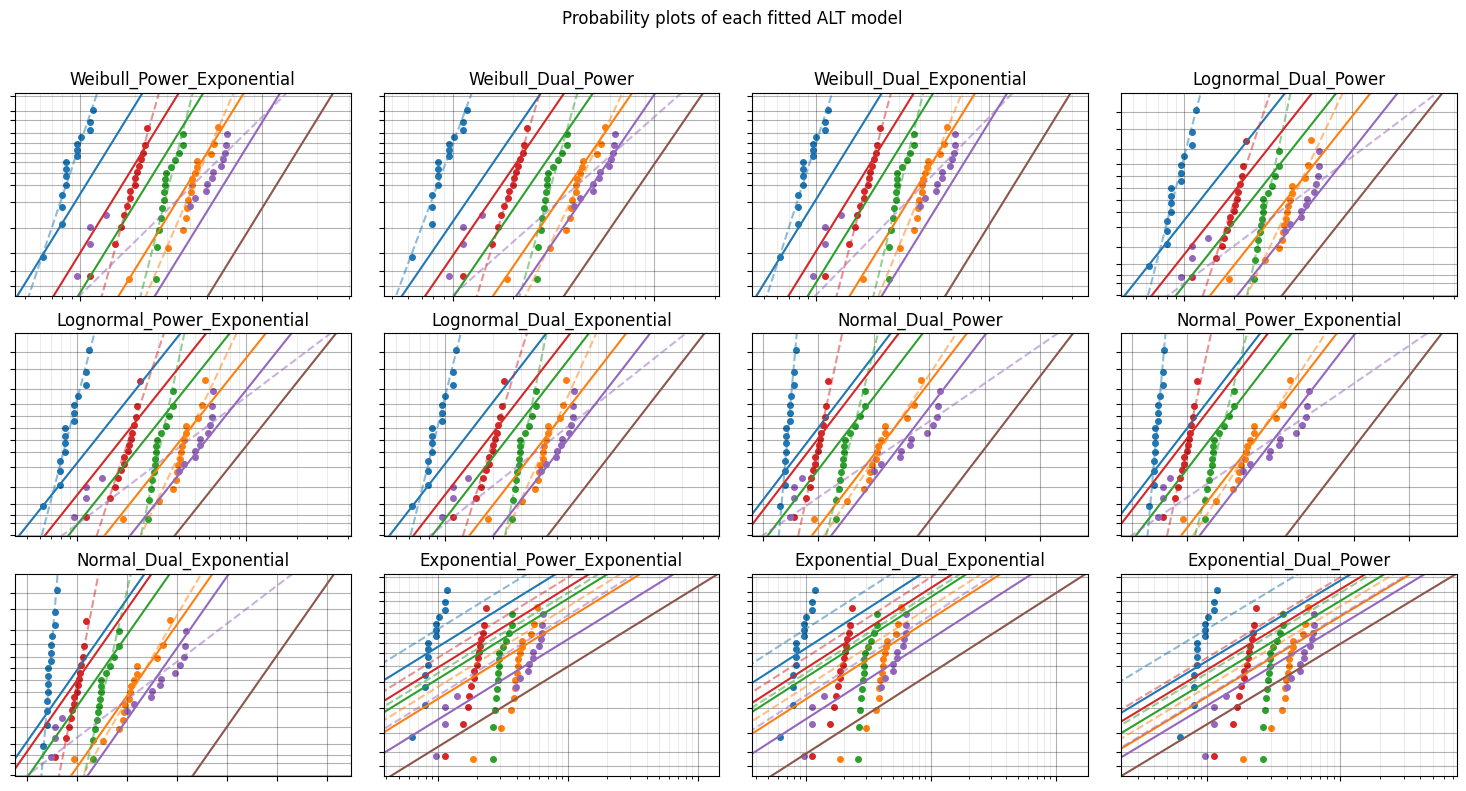

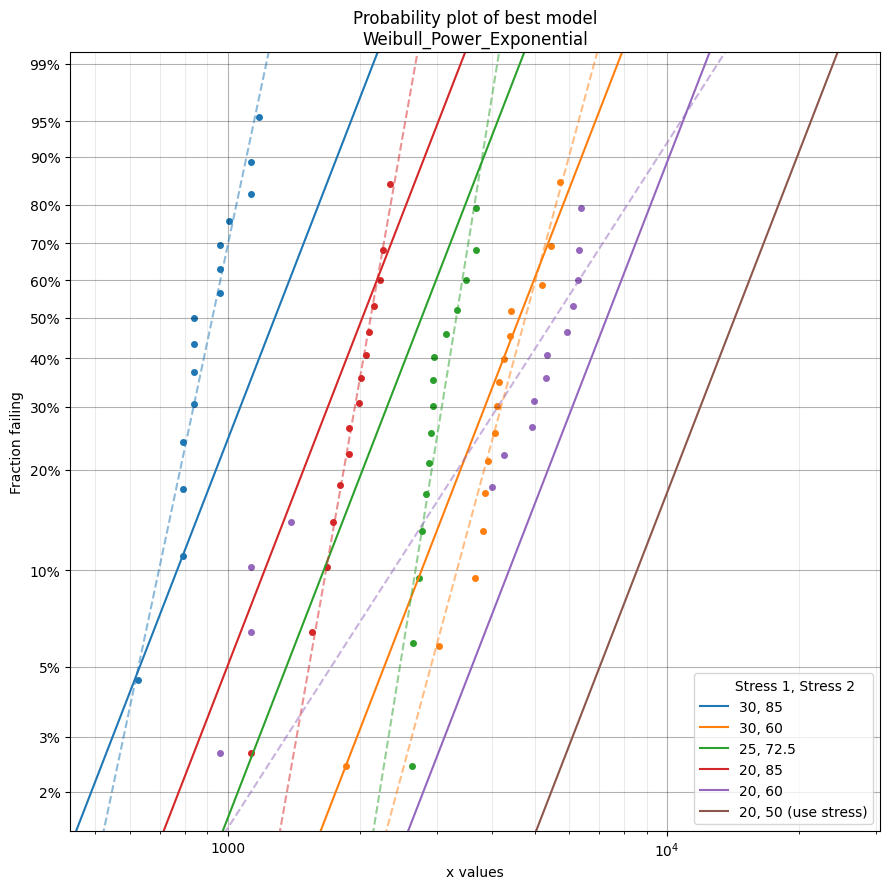

In [8]:
from reliability.ALT_fitters import Fit_Everything_ALT

Fit_Everything_ALT(failures= lifetimes_total, failure_stress_1= stress1_total, failure_stress_2=stress2_total , right_censored=right_censor , right_censored_stress_1=stress1_total_censor ,right_censored_stress_2=stress2_total_censor , use_level_stress=[20,50])